
# NLP, DS-поток
## Задание 1
### Embeddings. Word2Vec. Conv1D

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---
### Задача 1

В данном домашнем задании вам предлагается проанализировать и улучшить модель для задачи `Sentiment Analysis`, которую вы обучали на семинаре.

Предлагается выполнить следующие пункты:


1. **(20 баллов)** Примените стемминг или лемматизацию к датасету. Как поменялось качество? 

2. **(20 баллов)** Попробуйте изменить размерность эмбеддинга на сильно большую и сильно меньшую. В качестве размеров эмбеддингов можно взять 30 и 200. Как меняется качество модели? Какая модель более склонна к переобучению и почему?

3. **(20 баллов)** Посмотрите на обученнные вами эмбеддинги у модели с маленьким размером эмбеддинга из предыдущего пункта. Для нескольких слов найдите похожие на него по косинусной мере близости. 

5. **(20 баллов)** Попробуйте рассмотреть фильтры меньших размеров.
 * Рассмотрите фильтры размеров 1, 2, 3
 * Рассмотрите фильтры размеров 1, 2
 
 Сильно ли меняется качество модели для данной задачи? Почему?

5. **(20 баллов)** Как можно заметить, у нас не сильно большая тренировочная выборка. Попробуйте сделать аугментацию текста. 

  Один из вариантов: заменять слово на синоним с какой-то вероятностью $p$. То есть с вероятностью $p$ каждое слово будет заменено на некоторый его синоним, а с вероятностью $1 - p$ слово останется как есть.


Для простоты анализа результатов стоит не применять сразу несколько улучшений, а делать их отдельно. В каждом выполняемом пункте **постройте кривую функции потерь** как для трейна, так и для валидации.

In [43]:
# фиксируем версии для воспроизводимости
# api некоторых пакетов может меняться
!pip install -U nltk==3.8.1 > null
!pip install -U gensim==4.3.2 > null
!pip install -U scipy==1.12 
!pip install -U torchtext==0.17.0 > null 
!pip install -U spacy==3.6.0 > null 
!pip install -U portalocker==2.8.2 > null 
# скачаем для использования spacy-токенайзера
!python -m spacy download en_core_web_sm > null 

2025-02-16 20:29:32.551994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-16 20:29:32.573720: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-16 20:29:32.580543: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1739737775.094700     205 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739737775.095314     205 cuda_executor.cc:1015] succ

In [130]:
import gensim
import nltk
import numpy as np
import random
import seaborn as sns
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchtext

from collections import Counter, OrderedDict
from string import punctuation

from matplotlib import pyplot as plt
from IPython.display import clear_output

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from torchtext import data, datasets
from torchtext.data.utils import get_tokenizer
from torchtext.data.functional import to_map_style_dataset
from torchtext.vocab import build_vocab_from_iterator

from torch.utils.data import random_split, DataLoader
from torch.nn.utils.rnn import pad_sequence
# spoilers-----------^


import spacy

nltk.download('punkt') # этот модуль необходим для токенизации текстов и работы с пунктуацией
nltk.download('wordnet') # с помощью этого модуля можно получить граф зависимостей между словами
nltk.download('omw-1.4') # Open Multilingual Wordnet
sns.set(font_scale=1.6)

print(f"torchtext version: {torchtext.__version__}")

torchtext version: 0.17.0+cpu


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Зафиксируем random seed для воспроизводимости результатов

In [131]:
SEED = 1234
random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

Скачаем данные, представив их в виде трейна, валидации и теста.

In [132]:
train_iter, test_iter = datasets.IMDB()

train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)

# размер. обуч выборки
num_train = int(len(train_dataset) * 0.9)

train_data, valid_data = random_split(
    train_dataset, 
    [num_train, len(train_dataset) - num_train],
    torch.Generator().manual_seed(SEED)
)

По желанию используйте вспомогательные функции с семинара. Вы можете их переписать и(или) дополнить, если потребуется.

In [133]:
# maybe

__1. Предобработка данных__

Примените стемминг или лемматизацию к обучающему, валидационному и тестовому датасету.


In [134]:
print(f"Число примеров в обучающей выборке: {len(train_data)}")
print(f"Число примеров в валидационной выборке: {len(valid_data)}")
print(f"Число примеров в тестовой выборке: {len(test_dataset)}")

Число примеров в обучающей выборке: 22500
Число примеров в валидационной выборке: 2500
Число примеров в тестовой выборке: 25000


Посмотрим на пример из данных

In [135]:
train_dataset[13]

(1,
 "Its not the cast. A finer group of actors, you could not find. Its not the setting. The director is in love with New York City, and by the end of the film, so are we all! Woody Allen could not improve upon what Bogdonovich has done here. If you are going to fall in love, or find love, Manhattan is the place to go. No, the problem with the movie is the script. There is none. The actors fall in love at first sight, words are unnecessary. In the director's own experience in Hollywood that is what happens when they go to work on the set. It is reality to him, and his peers, but it is a fantasy to most of us in the real world. So, in the end, the movie is hollow, and shallow, and message-less.")

In [136]:
train_dataset[22222]

(2,
 "well i wasn't sure what the film was going to be like as i had only seen a little clip but i was thinking its going to be good and i was right i watched it twice on the day i got it and well it is my favourite film.<br /><br />i think Alison Lohan played the part of beth really well she is such a grate actress and the writer must have gone into a lot of research to find out about bulimia although the ending when beth is in the hospital an has 2 Horus observation after meals because iv been told like 1 house is OK and also that hospitals doesn't help bulimics as iv been told which is probably why I'm still at home even tho my sister and mum would like to have me hospitalised as i to have bulimia but this is a grate film i recommend it to any one with or with out an eating disorder or for people who know some one with eating disorders as it can let them in to the lives of a bulimic person and see the world how they do a bit over all a grate film and i recommend it to any one and an

Отсюда вывод 1 -- негативный отзыв, 2 -- положительный

Будем применять стемминг к каждом слову в отзыве.

In [137]:
def get_stememd_data(data):
    ps = PorterStemmer()
    new_data = []

    for review in data:
        label, text = review[0] - 1, review[1]
        new_text = ' '.join([ps.stem(word) for word in word_tokenize(text)])
        new_data.append([label, new_text])
    return new_data
    
train_data  = get_stememd_data(train_data)
valid_data = get_stememd_data(valid_data)
test_dataset = get_stememd_data(test_dataset)

Зададим токенизатор

In [138]:
tokenizer = get_tokenizer("spacy", language="en_core_web_sm")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1742: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Ограничьте словарь для модели, убрав наименее частые слова. Это сделает обучение модели менее ресурсозатратным, а также позволит избавиться от потенциальных слов с орфографическими ошибками.

Удалим стоп-слова

In [139]:
from string import punctuation

train_iter = datasets.IMDB(split="train") # данные
stop_words = nltk.corpus.stopwords.words("english") # стоп-слова
punc = list(punctuation) # пунктуация

# посчитаем частотность токенов
counter = Counter()
for _, text in train_iter:
    counter.update(
        token for token in tokenizer(text) \
        if token not in stop_words and token not in punc
    )

In [140]:
MAX_VOCAB_SIZE = 25000

ordered_dict = OrderedDict(counter.most_common(MAX_VOCAB_SIZE))
vocab = torchtext.vocab.vocab(ordered_dict)

unk_token = "<unk>"
vocab.append_token(unk_token)
# используем по умолчанию для токенов вне словаря
vocab.set_default_index(vocab[unk_token])
UNK_IDX = vocab[unk_token]

Предобработаем данные

In [141]:
# кодируем "pos", "neg" в 0 и 1
le = LabelEncoder()

train_labels = le.fit_transform([label for label, _ in train_data])
valid_labels = le.transform([label for label, _ in valid_data])
test_labels = le.transform([label for label, _ in test_dataset])

train_texts = [vocab(tokenizer(text)) for _, text in train_data]
valid_texts = [vocab(tokenizer(text)) for _, text in valid_data]
test_texts = [vocab(tokenizer(text)) for _, text in test_dataset]

Добавим <unk> токен для неизвестных токенов.

Создайте итератор для обучающего, валидационного и тестового датасетов. Будет полезно обратить внимание на типы датасетов в Pytorch: [ссылка](https://pytorch.org/docs/stable/data.html#dataset-types).

In [142]:
BATCH_SIZE = 64
# если есть возможность подключиться к GPU, сделаем это
# для ускорения вычислений
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def pad_collate(batch):
    """
    Формирует тензоры из токенизированных текстов и меток, а также
    дополняет последовательности токенов до макс. длины в батче с UNK_IDX
    """
    texts, labels = zip(*batch)

    # сформируем тензоры
    texts_tensors = [torch.LongTensor(t).to(DEVICE) for t in texts]
    labels_tensors = torch.FloatTensor(labels).to(DEVICE)
    # дополним до макс. длины в батче
    texts_padded = pad_sequence(
        texts_tensors,
        batch_first=True,
        padding_value=UNK_IDX
    )
    return texts_padded, labels_tensors

Создадим даталоадеры.

In [143]:
train_loader = DataLoader(
    list(zip(train_texts, train_labels)),
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=pad_collate
)

valid_loader = DataLoader(
    list(zip(valid_texts, valid_labels)),
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=pad_collate
)

test_loader = DataLoader(
    list(zip(test_texts, test_labels)),
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=pad_collate
)

Зададим модель, аналогичную той, что была на семинаре.

In [144]:
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        """
        Функция инициализации модели.

        Параметры.
        1) vocab_size — размер словаря,
        2) embedding_dim — размерность векторов-эмбеддингов,
        3) n_filters — количество свёрточных фильтров на каждом слое,
        4) filter_sizes — количество свёрточных слоёв,
        5) output_dim — размер выхода модели,
        6) dropout — вещественное число от 0 до 1, вероятность отключения нейронов,
        7) pad_idx — токен для паддинга.
        """

        super().__init__()
        # эмбеддинг-слой
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        # свёрточные слои
        self.convs = nn.ModuleList([
          nn.Conv1d(
              in_channels=embedding_dim, out_channels=n_filters, 
              kernel_size=fs,
          ) for fs in filter_sizes
        ])
        # полносвязный слой для получение выхода модели
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        # dropout для регуляризации сети
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        """ Функция для получения выходов сети по текстам """
                
        #text.dim = [batch size, sent len]
        #embedded.dim = [batch size, sent len, emb dim]
        embedded = self.embedding(text)
        
        #embedded.dim = [batch size, emb dim, sent len]
        embedded = embedded.permute(0, 2, 1)

        #conved_n.dim = [batch size, n_filters, sent len - filter_sizes[n] + 1]
        conved = [F.relu(conv(embedded)) for conv in self.convs]

        #pooled_n.dim = [batch size, n_filters]  
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #cat.dim = [batch size, n_filters * len(filter_sizes)]
        cat = self.dropout(torch.cat(pooled, dim = 1))   

        return self.fc(cat)

Проинициализируйте и обучите модель.

In [145]:
INPUT_DIM = len(vocab)    # размер словаря
EMBEDDING_DIM = 100       # размерность векторов-эмбеддингов
N_FILTERS = 100           # количество свёрточных фильтров
FILTER_SIZES = [3, 4, 5]  # размеры фильтров на каждом уровне
OUTPUT_DIM = 1            # размерность выхода (сеть выдаёт вероятность для одного класса)
DROPOUT = 0.5             # вероятность dropout
PAD_IDX = UNK_IDX         # id токена для паддинга

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [146]:
def count_parameters(model):
    """ Подсчёт числа параметров модели """
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Модель имеет {count_parameters(model):,} обучаемых параметров")
print(f"Слой ембеддингов: {count_parameters(model.embedding):,} обучаемых параметров")
print(f"Слои свёртки: {count_parameters(model.convs):,} обучаемых параметров")
print(f"Линейный слой: {count_parameters(model.fc):,} обучаемых параметров")
model.eval()

Модель имеет 2,620,701 обучаемых параметров
Слой ембеддингов: 2,500,100 обучаемых параметров
Слои свёртки: 120,300 обучаемых параметров
Линейный слой: 301 обучаемых параметров


CNN(
  (embedding): Embedding(25001, 100, padding_idx=25000)
  (convs): ModuleList(
    (0): Conv1d(100, 100, kernel_size=(3,), stride=(1,))
    (1): Conv1d(100, 100, kernel_size=(4,), stride=(1,))
    (2): Conv1d(100, 100, kernel_size=(5,), stride=(1,))
  )
  (fc): Linear(in_features=300, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Возьмем основные функции из семинарского датасета.

In [147]:
def binary_accuracy(preds, y):
    """
    Возвращает точность модели.

    Параметры.
    1) preds — предсказания модели,
    2) y — истинные метки классов.
    """

    # округляет предсказания до ближайшего integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc


def train(model, iterator, optimizer, criterion, loss_history):
    """
    Функция для обучения модели на обучающем датасете и подсчёта
    её точности.

    Параметры.
    1) model — модель,
    2) iterator — итератор обучающего датасета,
    3) optimizer — класс метода оптимизации,
    4) criterion — функция потерь.
    """

    epoch_loss = 0
    epoch_acc = 0
    model.train()

    for batch_id, batch in enumerate(iterator):
        # чтобы градиент не накапливался, его нужно обнулить
        optimizer.zero_grad()
        # получим предсказания модели
        texts, labels = batch
        predictions = model(texts).squeeze(1)
        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)

        # сделаем back-propagation для подсчёта градиентов
        loss.backward()
        # выполним шаг оптимизатора
        optimizer.step()
        # обновим метрики
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        loss_history.append(loss.item())

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def evaluate(model, iterator, criterion, loss_history=None):
    """
    Функция для применения модели на валидационном/тестовом датасете и подсчёта
    её точности.

    Параметры.
    1) model — модель,
    2) iterator — итератор датасета,
    3) criterion — функция потерь.
    """

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad(): # отключим подсчёт градиентов на валидации
        for batch_id, batch in enumerate(iterator):
            inp, label = batch

            # получим предсказания
            predictions = model(inp).squeeze(1)
            # посчитаем метрики
            loss = criterion(predictions, label)
            acc = binary_accuracy(predictions, label)
            # обновим метрики
            epoch_loss += loss.item()
            epoch_acc += acc.item()
            if loss_history is not None:
                loss_history.append(loss.item())

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def epoch_time(start_time, end_time):
    """
    Функция для подсчёта времени работы одной эпохи.

    Параметры.
    1) start_time — время начала запуска,
    2) end_time — время завершения работы эпохи.
    """

    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


def training_loop(model_instance, n_epochs=10):
    """
    Функция для обучения нейронной сети.

    Параметры.
    1) model_instance — обучаемая модель,
    2) n_epochs — количество эпох.
    """

    best_valid_loss = float('inf')
    loss_history = []
    val_loss_history = []
    acc_history = []
    val_acc_history = []

    for epoch in range(n_epochs):
        start_time = time.time()
        # Обучим одну эпоху на обучающем датасете
        train_loss, train_acc = train(model_instance, train_loader, optimizer, criterion, loss_history)
        acc_history.append(train_acc)

        # Оценим точность модели на тестовом датасете
        valid_loss, valid_acc = evaluate(model_instance, valid_loader, criterion, val_loss_history)
        val_acc_history.append(valid_acc)

        # Посчитаем время работы одной эпохи
        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        # Отобразим графики loss'ов
        clear_output(True)
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        plt.plot(loss_history)
        plt.title("Train Loss")
        plt.xlabel("Номер батча")
        plt.subplot(1, 3, 2)
        plt.plot(val_loss_history, color="tab:orange")
        plt.title("Valid Loss")
        plt.xlabel("Номер батча")
        # Если значение функции потерь улучшилось, сохраним параметры модели
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model_instance.state_dict(), 'model_checkpoint.pt')

        # Отрисуем значение точности от эпохи
        plt.subplot(1, 3, 3)
        plt.plot(acc_history, label="Train")
        plt.plot(val_acc_history, label="Valid")
        plt.legend()
        plt.title("Accuracy")
        plt.xlabel("Номер эпохи")
        plt.show()

        print(f"Номер эпохи: {epoch+1:02} | Время обучения эпохи: {epoch_mins}m {epoch_secs}s")


Теперь займемся обучением модели

In [148]:
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

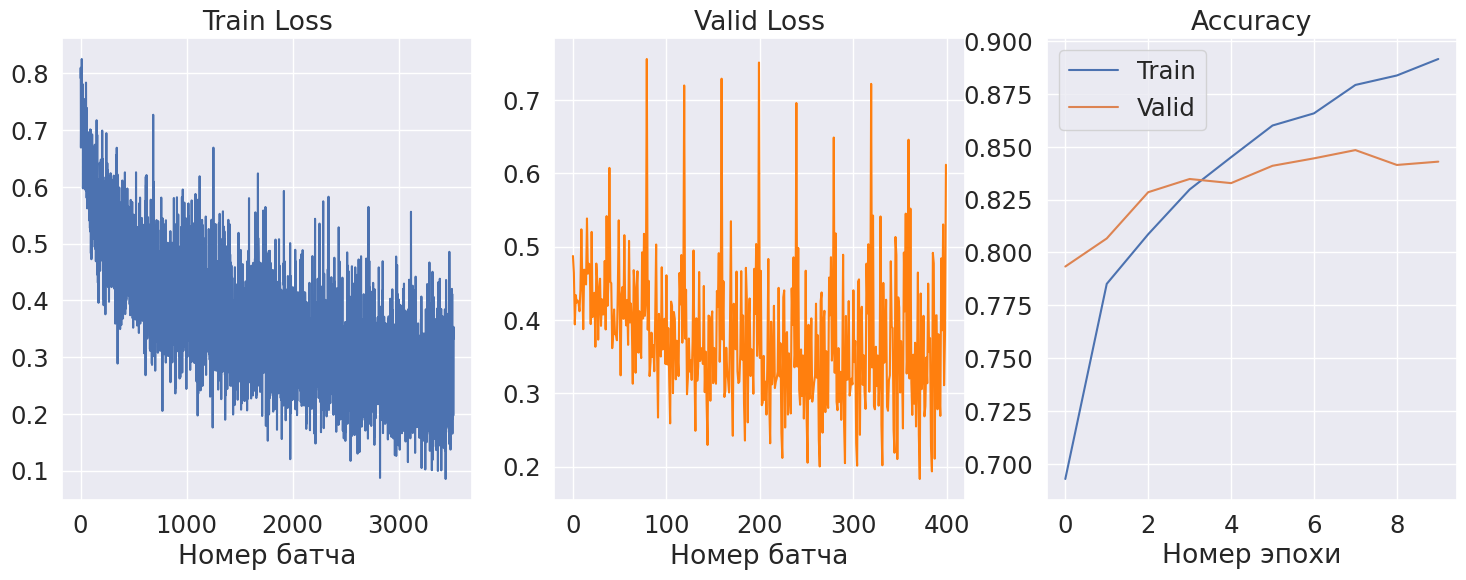

Номер эпохи: 10 | Время обучения эпохи: 0m 10s


In [149]:
training_loop(model)

Посчитайте качество модели на тестовой выборке.

In [150]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.333 | Test Acc: 85.48%


Как видим, модель выдала достаточно высокий результат.

__2. Изменение размера эмбеддинга__

Уменьшите размер эмбеддингов до 30. Как поменялось качество модели? 

*Замечание.* Если в предыдущем пункте вы перезаписали датасеты, применив к ним стемминг или лемматизацию, то их нужно скачать заново. Обратите внимание также на используемый словарь. 

In [151]:
train_iter, test_iter = datasets.IMDB()

train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)

# размер. обуч выборки
num_train = int(len(train_dataset) * 0.9)

train_data, valid_data = random_split(
    train_dataset, 
    [num_train, len(train_dataset) - num_train],
    torch.Generator().manual_seed(SEED)
)

# кодируем "pos", "neg" в 0 и 1
le = LabelEncoder()

train_labels = le.fit_transform([label for label, _ in train_data])
valid_labels = le.transform([label for label, _ in valid_data])
test_labels = le.transform([label for label, _ in test_dataset])

train_texts = [vocab(tokenizer(text)) for _, text in train_data]
valid_texts = [vocab(tokenizer(text)) for _, text in valid_data]
test_texts = [vocab(tokenizer(text)) for _, text in test_dataset]

train_loader = DataLoader(
    list(zip(train_texts, train_labels)),
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=pad_collate
)

valid_loader = DataLoader(
    list(zip(valid_texts, valid_labels)),
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=pad_collate
)

test_loader = DataLoader(
    list(zip(test_texts, test_labels)),
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=pad_collate
)

Теперь поменяем количество эмбедингов модели.

In [152]:
INPUT_DIM = len(vocab)    # размер словаря
EMBEDDING_DIM = 30       # размерность векторов-эмбеддингов
N_FILTERS = 100           # количество свёрточных фильтров
FILTER_SIZES = [3, 4, 5]  # размеры фильтров на каждом уровне
OUTPUT_DIM = 1            # размерность выхода (сеть выдаёт вероятность для одного класса)
DROPOUT = 0.5             # вероятность dropout
PAD_IDX = UNK_IDX         # id токена для паддинга

model_30 = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
optimizer = torch.optim.Adam(model_30.parameters())
criterion = nn.BCEWithLogitsLoss()
model_30 = model_30.to(DEVICE)
criterion = criterion.to(DEVICE)

In [153]:
print(f"Модель имеет {count_parameters(model_30):,} обучаемых параметров")
print(f"Слой ембеддингов: {count_parameters(model_30.embedding):,} обучаемых параметров")
print(f"Слои свёртки: {count_parameters(model_30.convs):,} обучаемых параметров")
print(f"Линейный слой: {count_parameters(model_30.fc):,} обучаемых параметров")
model_30.eval()

Модель имеет 786,631 обучаемых параметров
Слой ембеддингов: 750,030 обучаемых параметров
Слои свёртки: 36,300 обучаемых параметров
Линейный слой: 301 обучаемых параметров


CNN(
  (embedding): Embedding(25001, 30, padding_idx=25000)
  (convs): ModuleList(
    (0): Conv1d(30, 100, kernel_size=(3,), stride=(1,))
    (1): Conv1d(30, 100, kernel_size=(4,), stride=(1,))
    (2): Conv1d(30, 100, kernel_size=(5,), stride=(1,))
  )
  (fc): Linear(in_features=300, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Обучим модель

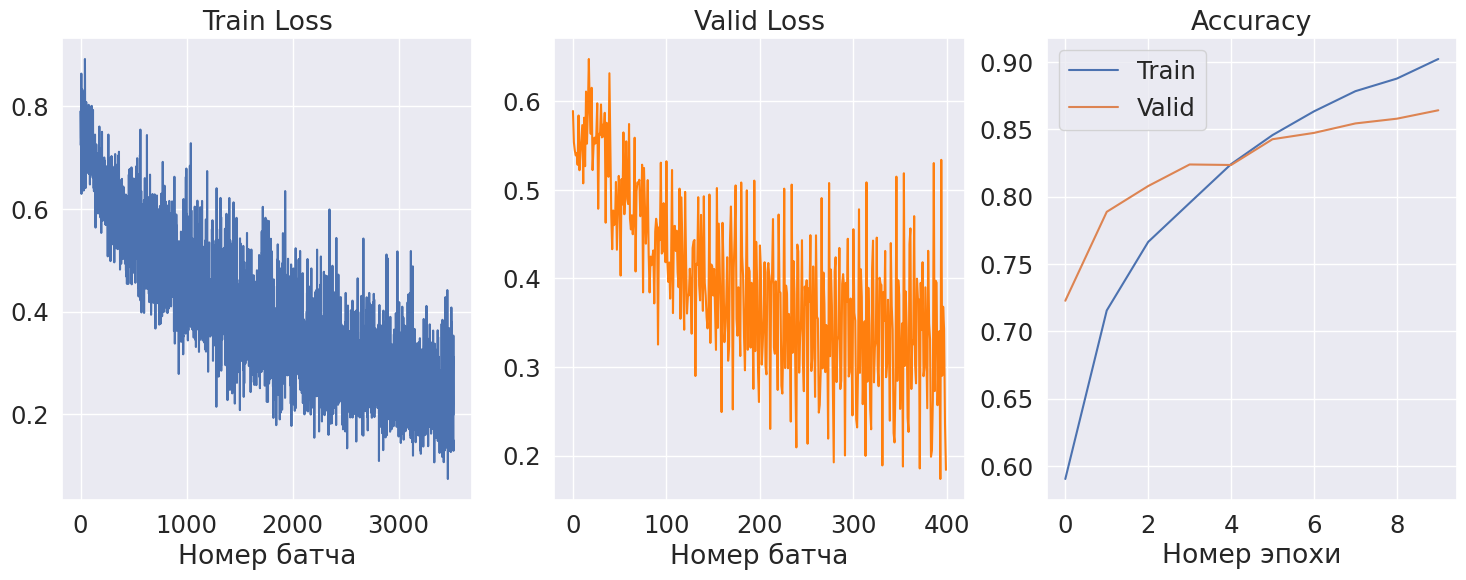

Номер эпохи: 10 | Время обучения эпохи: 0m 8s


In [154]:
training_loop(model_30)

Посмотрим на качество

In [155]:
model_30.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model_30, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.334 | Test Acc: 85.86%


Теперь  увеличьте размер эмбеддингов до 200. Как поменялось качество модели в сравнении с предыдущей? Какая модель более склонна к переобучению и почему?

Сделайте выводы.

In [156]:
INPUT_DIM = len(vocab)    # размер словаря
EMBEDDING_DIM = 200       # размерность векторов-эмбеддингов
N_FILTERS = 100           # количество свёрточных фильтров
FILTER_SIZES = [3, 4, 5]  # размеры фильтров на каждом уровне
OUTPUT_DIM = 1            # размерность выхода (сеть выдаёт вероятность для одного класса)
DROPOUT = 0.5             # вероятность dropout
PAD_IDX = UNK_IDX         # id токена для паддинга

model_200 = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
optimizer = torch.optim.Adam(model_200.parameters())
criterion = nn.BCEWithLogitsLoss()
model_200 = model_200.to(DEVICE)
criterion = criterion.to(DEVICE)

In [157]:
print(f"Модель имеет {count_parameters(model_200):,} обучаемых параметров")
print(f"Слой ембеддингов: {count_parameters(model_200.embedding):,} обучаемых параметров")
print(f"Слои свёртки: {count_parameters(model_200.convs):,} обучаемых параметров")
print(f"Линейный слой: {count_parameters(model_200.fc):,} обучаемых параметров")
model_200.eval()

Модель имеет 5,240,801 обучаемых параметров
Слой ембеддингов: 5,000,200 обучаемых параметров
Слои свёртки: 240,300 обучаемых параметров
Линейный слой: 301 обучаемых параметров


CNN(
  (embedding): Embedding(25001, 200, padding_idx=25000)
  (convs): ModuleList(
    (0): Conv1d(200, 100, kernel_size=(3,), stride=(1,))
    (1): Conv1d(200, 100, kernel_size=(4,), stride=(1,))
    (2): Conv1d(200, 100, kernel_size=(5,), stride=(1,))
  )
  (fc): Linear(in_features=300, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

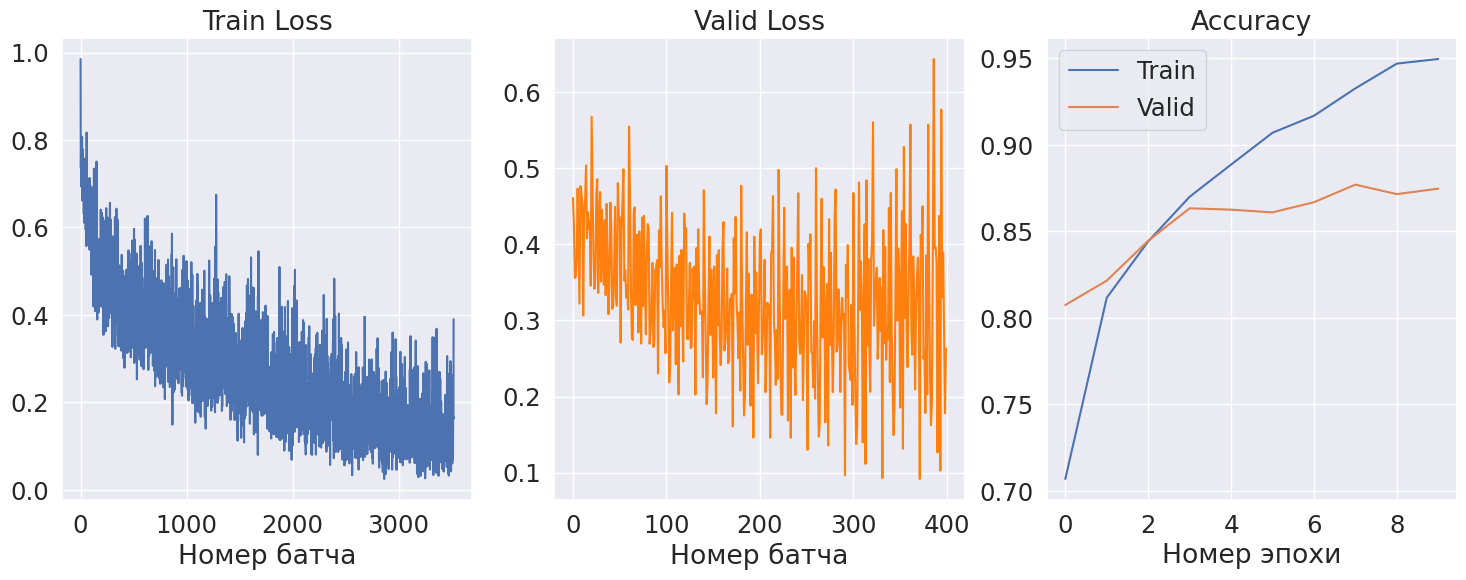

Номер эпохи: 10 | Время обучения эпохи: 0m 13s


In [158]:
training_loop(model_200)

In [159]:
model_200.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model_200, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.291 | Test Acc: 87.95%


**Выводы**

Как видим, в виду увеличения контекста, модель смогла лучше распозновать тональность отзыва. Таким образом, модель с большим количеством эмбедингов оказалась лучше.

Меж тем, заметим, что увеличение контекста привело к переобучения модели, в виду того что модель начала замечать новые детали, которые не являются важными в оценке отзыва.

__3. Нахождение близких слов по эмбеддингам.__

Напишите функцию, считающую [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) между двумя векторами. Именно косинусная мера близости очень часто используется в качестве меры схожести двух эмбеддинг-векторов.

In [160]:
def cosine_similarity(a, b):
    a_norm = torch.norm(a, dim=1, keepdim=True)
    b_norm = torch.norm(b, dim=1, keepdim=True)

    eps = 1e-8
    a_norm = torch.clamp(a_norm, min=eps)
    b_norm = torch.clamp(b_norm, min=eps)

    dot_product = torch.mm(b, a.T)
    cosine_sim = dot_product / (b_norm * a_norm)

    return cosine_sim

Напишите функцию, которая принимает на вход слово word и $k$ и возвращает $k$ наиболее похожих на word слов. 

Эмбеддинги для каждого слова должны быть получены с помощью матрицы эмбеддингов из Embedding слоя вашей модели. В качестве модели возьмите модель из предыдущего пункта с маленьким размером эмбеддинга. 

Чтобы по слову получить его индекс в словаре и обратно можно воспользоваться методами: `lookup_indices` и `lookup_token`. Подробнее про эти методы можно посмотреть в [документации](https://pytorch.org/text/stable/vocab.html) используемеого `torchtext`'a.



In [161]:
model_30.cpu();

In [162]:
def find_most_similar(word, k):
    # self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
    embeddings = model_30.embedding.weight
    
    word_idx = vocab.lookup_indices([word])[0]
    embedding_tensor = embeddings[word_idx].unsqueeze(0)
    
    similarities = cosine_similarity(embedding_tensor, embeddings).squeeze()
    top_k_indices = similarities.topk(k + 1).indices.tolist()

    most_similar_words = [vocab.lookup_token(idx) for idx in top_k_indices if idx != word_idx][:k]

    return most_similar_words

Выберите несколько слов из словаря и посмотрите на их ближайшие по эмбеддингу 5 слов.

In [163]:
find_most_similar('great', 5)

['Civilization', 'Gardner', 'lion', 'manual', 'central']

In [164]:
find_most_similar('drama', 5)

['tunes', 'staple', 'Hellman', 'codes', 'register']

In [165]:
find_most_similar('wife', 5)

['artistry', 'IN', 'weep', 'whales', 'Tramp']

**Выводы**

Ввиду малой длины эмбеддингов, полученное слова с трудом можно соотнести. Вероятно более разумно использовать модель с большей длиной эмбедингов для лучшей кодировки.

__4. Эксперементы со свёртками.__

Обучите модель с фильтрами меньших размеров: 1, 2 и 3. Измерьте ее качество и подумайте как наилучшим образом изобразить результаты.

In [166]:
INPUT_DIM = len(vocab)    # размер словаря
EMBEDDING_DIM = 100       # размерность векторов-эмбеддингов
N_FILTERS = 100           # количество свёрточных фильтров
FILTER_SIZES = [1, 2, 3]  # размеры фильтров на каждом уровне
OUTPUT_DIM = 1            # размерность выхода (сеть выдаёт вероятность для одного класса)
DROPOUT = 0.5             # вероятность dropouy_true = []

model_123 = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
optimizer = torch.optim.Adam(model_123.parameters())
criterion = nn.BCEWithLogitsLoss()
model_123 = model_123.to(DEVICE)
criterion = criterion.to(DEVICE)

In [167]:
print(f"Модель имеет {count_parameters(model_123):,} обучаемых параметров")
print(f"Слой ембеддингов: {count_parameters(model_123.embedding):,} обучаемых параметров")
print(f"Слои свёртки: {count_parameters(model_123.convs):,} обучаемых параметров")
print(f"Линейный слой: {count_parameters(model_123.fc):,} обучаемых параметров")
model_123.eval()

Модель имеет 2,560,701 обучаемых параметров
Слой ембеддингов: 2,500,100 обучаемых параметров
Слои свёртки: 60,300 обучаемых параметров
Линейный слой: 301 обучаемых параметров


CNN(
  (embedding): Embedding(25001, 100, padding_idx=25000)
  (convs): ModuleList(
    (0): Conv1d(100, 100, kernel_size=(1,), stride=(1,))
    (1): Conv1d(100, 100, kernel_size=(2,), stride=(1,))
    (2): Conv1d(100, 100, kernel_size=(3,), stride=(1,))
  )
  (fc): Linear(in_features=300, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

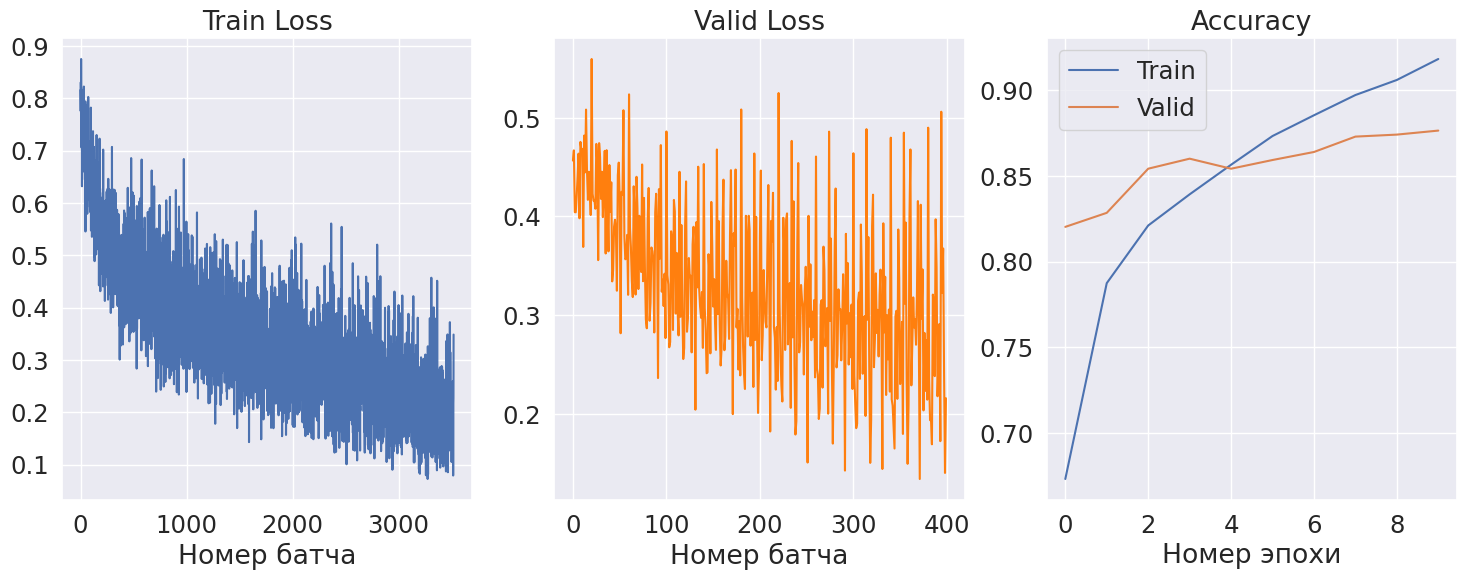

Номер эпохи: 10 | Время обучения эпохи: 0m 8s


In [168]:
training_loop(model_123)

In [169]:
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

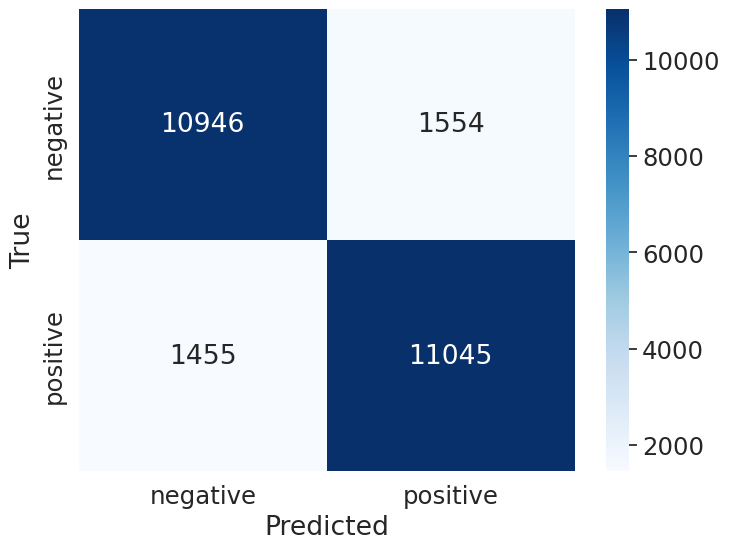

In [170]:
y_true = []
y_pred = []

model_123.eval()
with torch.no_grad():
    for batch in test_loader:
        inp, label = batch
        predictions = model_123(inp).squeeze(1)
        
        preds = (predictions > 0).int()

        y_pred.extend(preds.cpu().numpy())
        y_true.extend(label.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ['negative', 'positive'])

In [171]:
from sklearn.decomposition import PCA

def plot_embeddings_pca(model, vocab, words):
    # Получаем эмбеддинги всех слов из списка
    embeddings = model.embedding.weight.detach().cpu().numpy()
    word_indices = [vocab.lookup_indices([word])[0] for word in words]
    word_embeddings = np.array([embeddings[idx] for idx in word_indices])
    
    # Выполняем PCA до 2 компонент
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(word_embeddings)
    
    # Строим график
    plt.figure(figsize=(20, 12))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o', color='blue')
    
    # Подписываем слова
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=12)
    
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    
    plt.title("PCA Projection of Word Embeddings")
    plt.grid()
    plt.show()

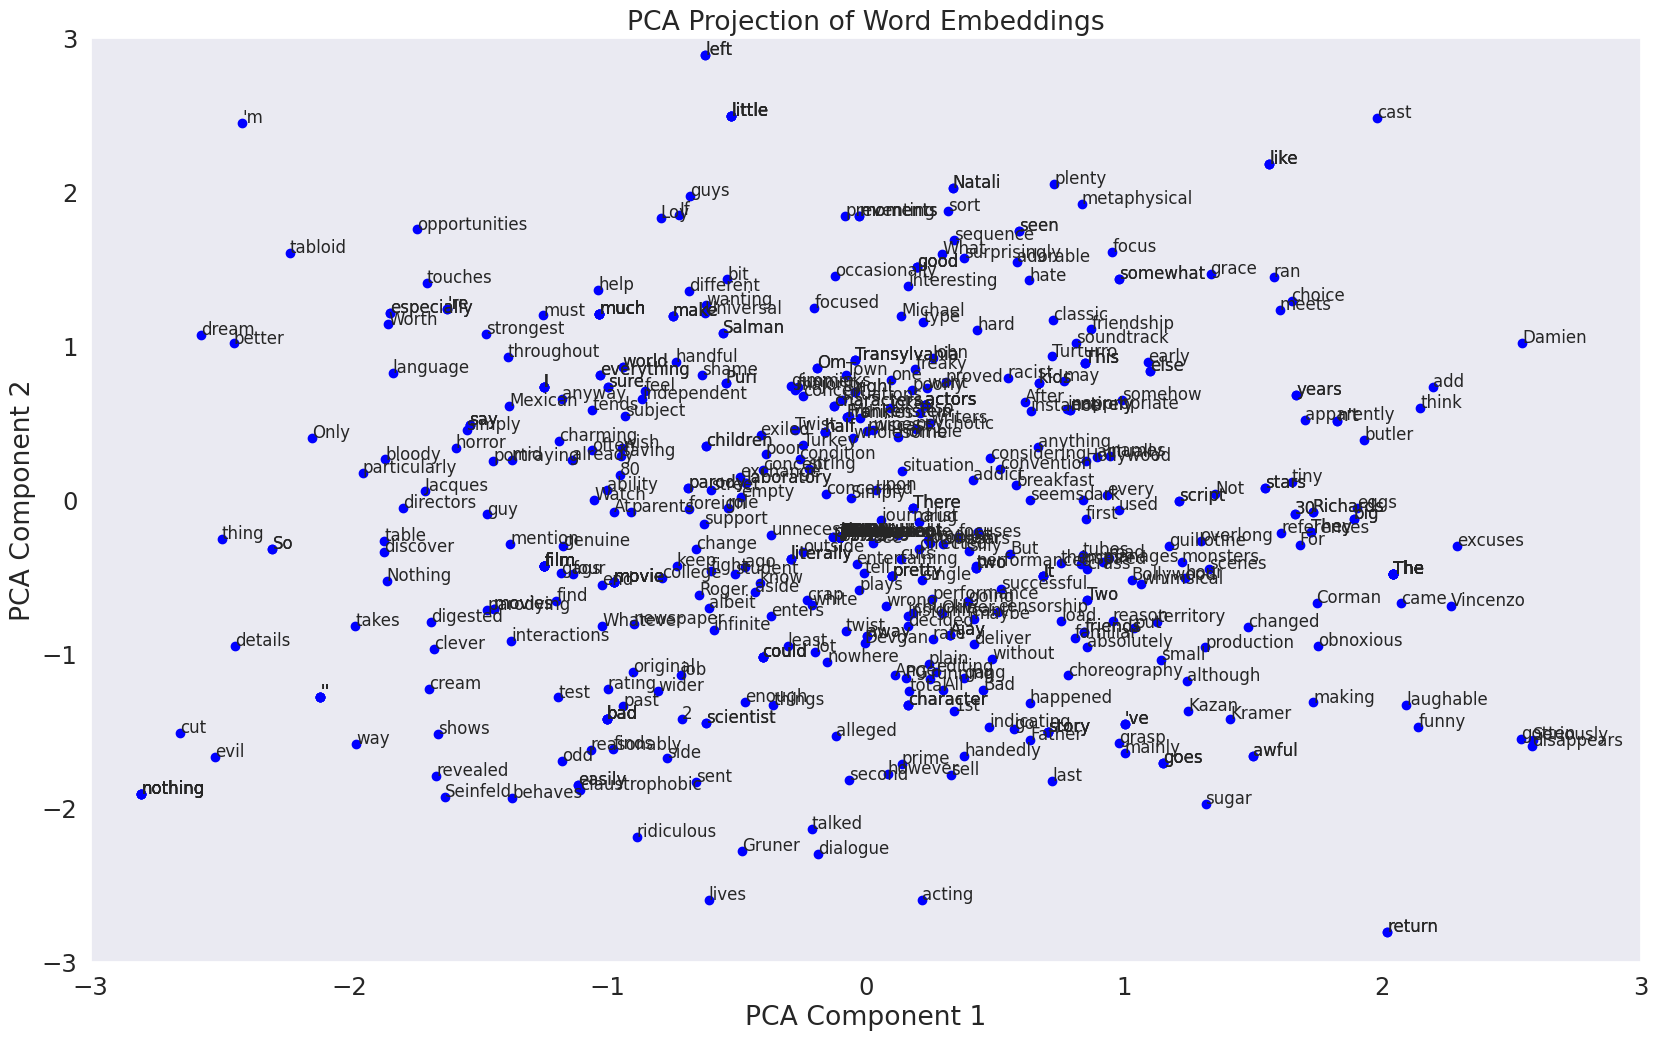

In [172]:
all_words = []
for idx in [1, 537, 12252, 15478]:
    words = [word for word in word_tokenize(train_data[idx][1])]
    all_words.extend(words)
plot_embeddings_pca(model_123, vocab, all_words)

In [173]:
model_123.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model_123, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.289 | Test Acc: 87.63%


Теперь рассмотрим лишь фильтры размера 1 и 2.

In [174]:
INPUT_DIM = len(vocab)    # размер словаря
EMBEDDING_DIM = 100       # размерность векторов-эмбеддингов
N_FILTERS = 100           # количество свёрточных фильтров
FILTER_SIZES = [1, 2]  # размеры фильтров на каждом уровне
OUTPUT_DIM = 1            # размерность выхода (сеть выдаёт вероятность для одного класса)
DROPOUT = 0.5             # вероятность dropout
PAD_IDX = UNK_IDX         # id токена для паддинга

model_12 = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
optimizer = torch.optim.Adam(model_12.parameters())
criterion = nn.BCEWithLogitsLoss()
model_12 = model_12.to(DEVICE)
criterion = criterion.to(DEVICE)

In [175]:
print(f"Модель имеет {count_parameters(model_12):,} обучаемых параметров")
print(f"Слой ембеддингов: {count_parameters(model_12.embedding):,} обучаемых параметров")
print(f"Слои свёртки: {count_parameters(model_12.convs):,} обучаемых параметров")
print(f"Линейный слой: {count_parameters(model_12.fc):,} обучаемых параметров")
model_12.eval()

Модель имеет 2,530,501 обучаемых параметров
Слой ембеддингов: 2,500,100 обучаемых параметров
Слои свёртки: 30,200 обучаемых параметров
Линейный слой: 201 обучаемых параметров


CNN(
  (embedding): Embedding(25001, 100, padding_idx=25000)
  (convs): ModuleList(
    (0): Conv1d(100, 100, kernel_size=(1,), stride=(1,))
    (1): Conv1d(100, 100, kernel_size=(2,), stride=(1,))
  )
  (fc): Linear(in_features=200, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

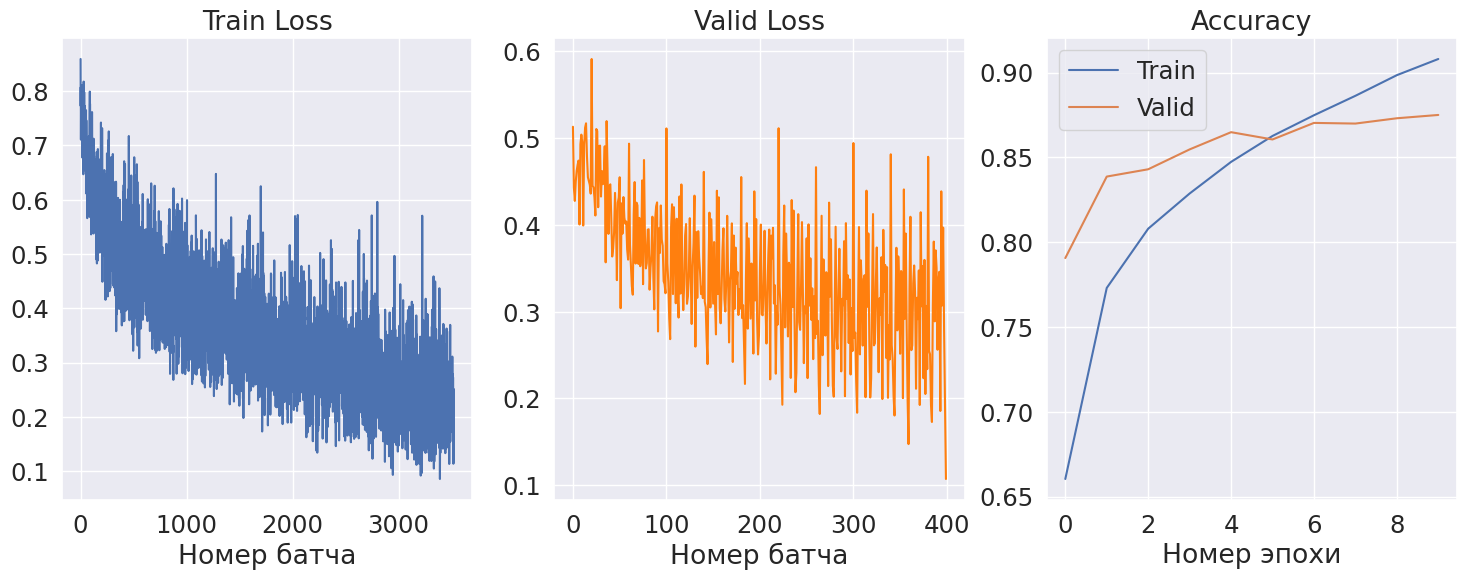

Номер эпохи: 10 | Время обучения эпохи: 0m 6s


In [176]:
training_loop(model_12)

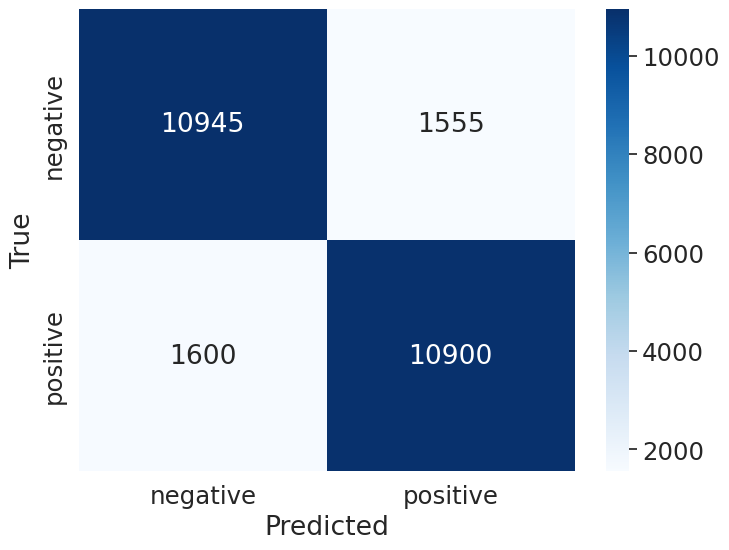

In [177]:
y_true = []
y_pred = []

model_12.eval()
with torch.no_grad():  # Отключаем подсчёт градиентов на валидации
    for batch in test_loader:
        inp, label = batch
        # Получаем предсказания от модели
        predictions = model_12(inp).squeeze(1)
        preds = (predictions > 0).int()

        y_pred.extend(preds.cpu().numpy())  
        y_true.extend(label.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ['negative', 'positive'])

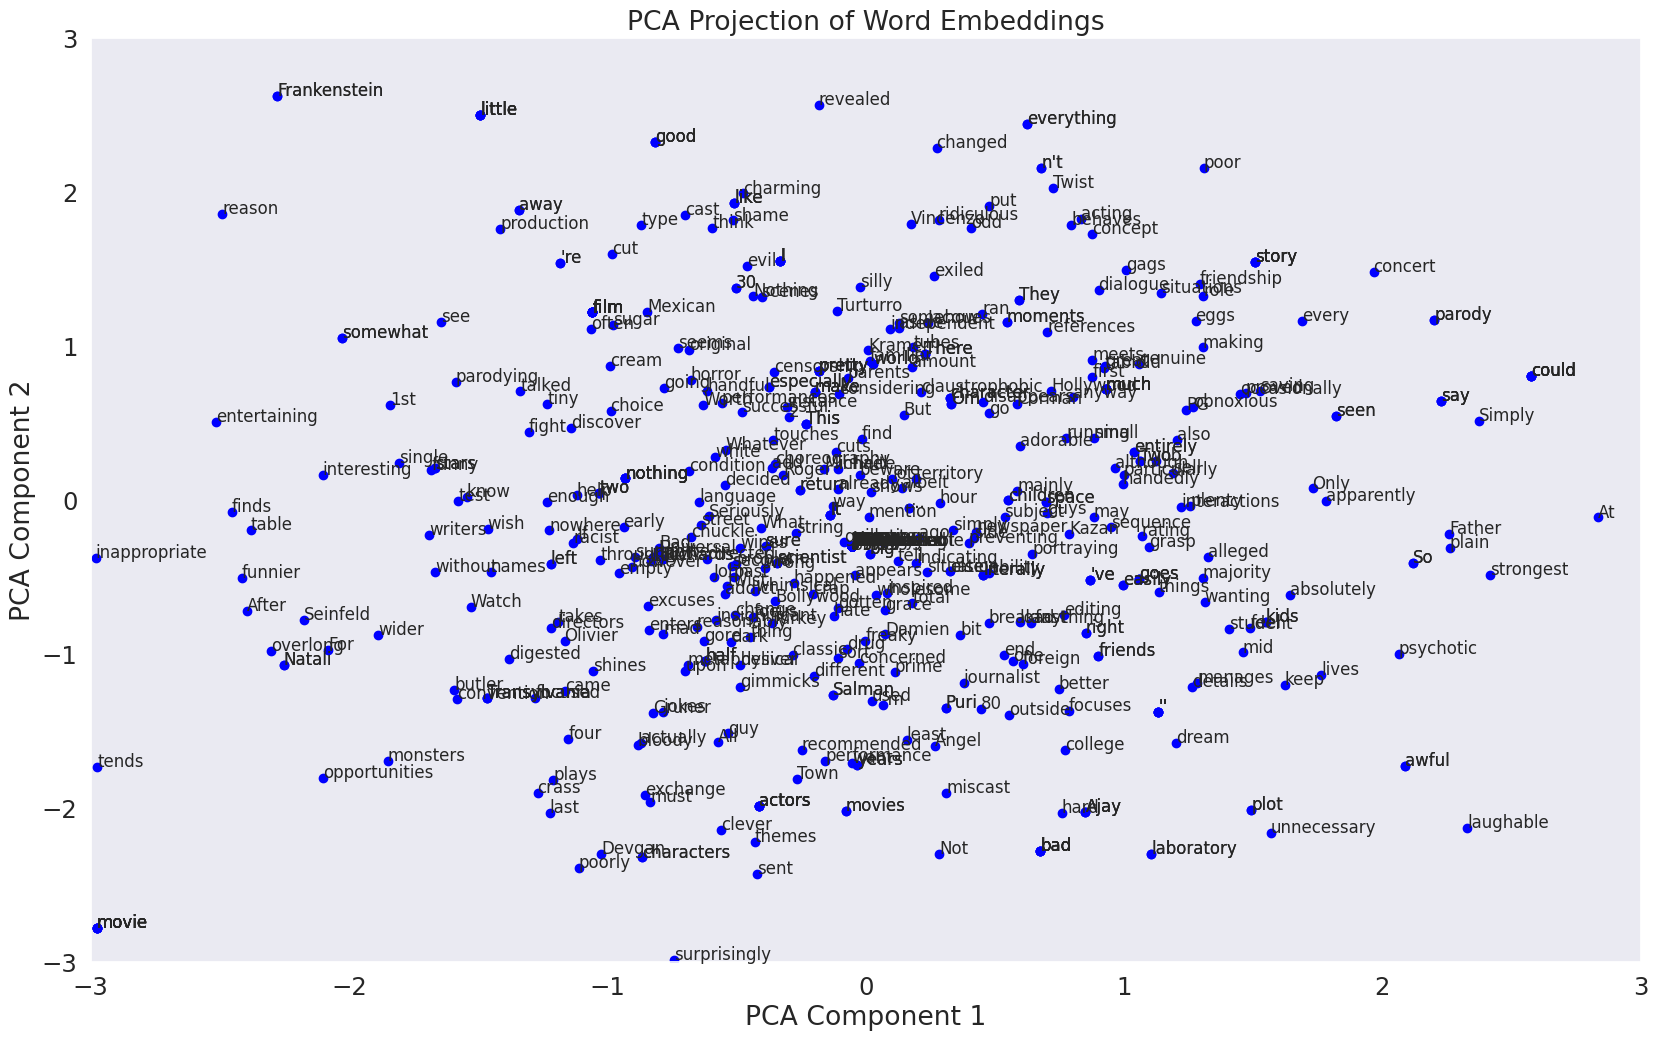

In [178]:
all_words = []
for idx in [1, 537, 12252, 15478]:
    words = [word for word in word_tokenize(train_data[idx][1])]
    all_words.extend(words)
plot_embeddings_pca(model_12, vocab, all_words)

In [179]:
model_12.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model_12, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.297 | Test Acc: 87.37%


Сильно ли меняется качество модели для данной задачи? Почему?

Качество модели почти не изменилось.

Вероятно это происходит из-за того того, что фильтры [1, 2, 3] не могут обнаружить более сложных зависимостей, из-за чего просто повторяют паттерны фильтров размера [1, 2]

Из анализа PCA не удалось отметить каких-то общих черт слов. Вероятно это связано с тем, что эмбеддинги имели слишком большую размерность, а потому нам сложно анализировать итоговые проекции.

__5. Аугментация данных.__

Попробуйте сделать аугментацию текста. 

Замените слово на синоним с некоторой вероятностью $p$. То есть с вероятностью $p$ каждое слово будет заменено на некоторый его синоним, а с вероятностью $1 - p$ слово останется как есть.

Обучите модель на таких данных и посмотрите на качество.

Так как контекст появления слова учесть мы не можем, то будем брать самое частое определение слова, а значит и синонимы к нему.

In [180]:
train_iter, test_iter = datasets.IMDB()

train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)

# размер. обуч выборки
num_train = int(len(train_dataset) * 0.9)

train_data, valid_data = random_split(
    train_dataset, 
    [num_train, len(train_dataset) - num_train],
    torch.Generator().manual_seed(SEED)
)

In [181]:
def get_augmented_data(data, prob=0.8):
    new_data = []

    for review in data:
        label, text = review[0], review[1]
        new_text = []
        
        for word in word_tokenize(text):
            if random.random() < prob:
                synonyms = wordnet.synsets(word)
                if synonyms and len(synonyms[0].lemma_names()) >= 2:
                    word = synonyms[0].lemma_names()[1]
                    
            new_text.append(word)
        
        new_text = ' '.join(new_text)
        new_data.append([label, new_text])
    
    return new_data

train_data = get_augmented_data(train_data)

In [182]:
le = LabelEncoder()

train_labels = le.fit_transform([label for label, _ in train_data])
valid_labels = le.transform([label for label, _ in valid_data])
test_labels = le.transform([label for label, _ in test_dataset])

train_texts = [vocab(tokenizer(text)) for _, text in train_data]
valid_texts = [vocab(tokenizer(text)) for _, text in valid_data]
test_texts = [vocab(tokenizer(text)) for _, text in test_dataset]

train_loader = DataLoader(
    list(zip(train_texts, train_labels)),
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=pad_collate
)

valid_loader = DataLoader(
    list(zip(valid_texts, valid_labels)),
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=pad_collate
)

test_loader = DataLoader(
    list(zip(test_texts, test_labels)),
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=pad_collate
)

In [183]:
INPUT_DIM = len(vocab)    # размер словаря
EMBEDDING_DIM = 100       # размерность векторов-эмбеддингов
N_FILTERS = 100           # количество свёрточных фильтров
FILTER_SIZES = [3, 4, 5]  # размеры фильтров на каждом уровне
OUTPUT_DIM = 1            # размерность выхода (сеть выдаёт вероятность для одного класса)
DROPOUT = 0.5             # вероятность dropout
PAD_IDX = UNK_IDX         # id токена для паддинга

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [184]:
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

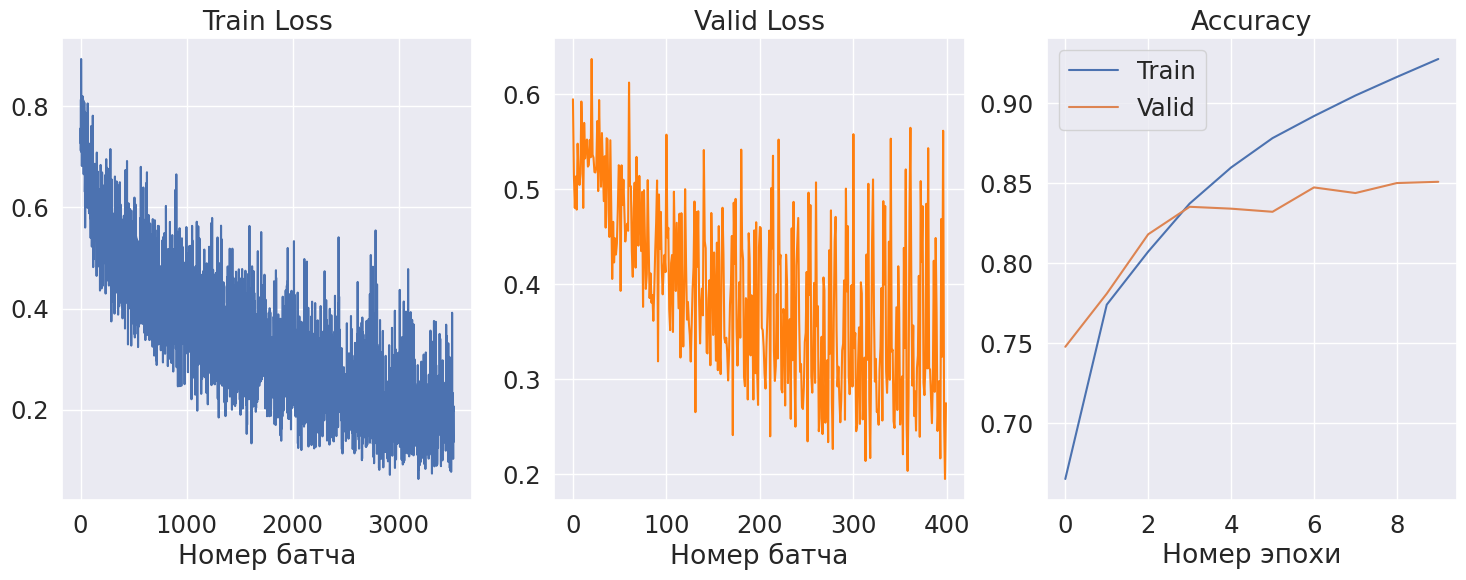

Номер эпохи: 10 | Время обучения эпохи: 0m 10s


In [185]:
training_loop(model)

In [186]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.357 | Test Acc: 84.57%


Как видим, точность упала совсем немного, и немного подрос лосс. Это говорит, что наша модель корректно строит эмбеддинги, то есть чем более похожи слова, тем больше вероятность, что их векторы совпадают.

**Выводы**

В задаче используя сверточную нейронную сеть иследовали качество работы от параметров.

При использовании стемминга модель хоть и потеряла в качестве но стала более устойчивой к переобучению. Это ожидаемо, так модели стало труднее находить особенности в трейне и приходилось искать общие черты текста

Было установлено, что при увеличении размера эмбеддингов модель хоть и выдает лучший результат, но быстрее переобучается.

Модель с меньшим размером фильтров оказалось более устойчивой, с сопостовимым качеством.

Аугментация данных с шансом заменить слово на синоним 0.8  почти не повлияло на качество модели, можно отметить что ее качество сопоставимо со случаем стеммиинга. 